<a href="https://colab.research.google.com/github/sanskratis17/laptop-price-pridiction/blob/main/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name = Section0></a>
<h1 style = "color : #79cc79"> Table of Content</h1>

-  [**Introduction**](#Section1)<br>
-  [**Problem Statement**](#Section2)<br>
-  [**Installing and Importing Libraries**](#Section3)<br>
-  [**Data Defination and Aquisition**](#Section4)<br>
-  [**Data Pre-Profiling**](#Section5)<br>
-  [**Data Pre Processing**](#Section6)<br>
-  [**Data Post-Profiliing**](#Section7)<br>
-  [**Exploratory Data Analysis**](#Section8)<br>
-  [**x,y split**](#Section9)<br>
-  [**TRain Test Split**](#Section1)<br>
-  [**Categorical and Continues Split**](#Section2)<br>
-  [**Scaling**](#Section3)<br>
-  [**Encoding**](#Section4)<br>
-  [**EDA 2**](#Section5)<br>
-  [**Modeling**](#Section6)<br>
-  [**Model Evaluation**](#Section7)<br>
-  [**Conclusion**](#Section9)<br>

##INTRODUCTION
A laptop, also known as a notebook computer, is a small, portable personal computer that is designed to be smaller and lighter than a desktop computer. Laptops are typically powered by a rechargeable battery and can be used away from a power source for a set period of time.
Here are some features of a laptop:
Design: Laptops usually have a clamshell design, with the screen on the inside of the upper lid and the keyboard on the inside of the lower lid. The screen hinges up to open.
Components: Laptops typically have a screen, keyboard, pointing device, speakers, microphone, and camera.
Operating system: Laptops usually run on desktop operating systems, which were originally developed for desktop computers.
Energy consumption: Laptops are generally lower in energy consumption than desktop computers.
Portability: Laptops are designed to be portable and easy to carry around.

##PROBLEM STATEMENT
LAPTOP PRICE PRIDICTION

Perform an exploratory data analysis (EDA) and Linear regression model on the provided "Laptop dataset" to extract meaningful insights about the trends, customer demographics, and laptop characteristics. The goal is to pridict price of laptop by analysin it's patterns, relationships, and features.

##IMPORTING LIBRARIES

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<a name = Section4></a>
<h1 style = "color : #79cc79"> Data Defination and Aquisition</h1>

 | Records | Features | Dataset Size |
          | :--: | :--: | :--: |
          | 1268  | 16 | 158.6kb  |


| ID | Feature                  | Description                       |
| :--| :------------------------| :---------------------------------|
| 1  | **Company:**                 |company of the laptop||||
| 2  | **Type name:**                | Type of the Laptop |  
| 3  | **Ram:**              | Ram of the laptop|  
| 4  | **Weight:**                 | Weight of laptop |
| 5  | **Price:**               |Price of laptop |
| 6  | **Touchscreen:**            |laptop is touchscreen or not              |  
| 7  | **IPS:**        |in-plane switching.|  
| 8 | **PPI:**           | pixel per inch.              |
| 9 | **CPU brand:**             |  Brand of CPU   
| 10 | **HDD:**             |  Hard disk drive
| 11  | **SSD:**                 |Solid state drive||||
| 12  | **Flash storage:**                | flash storage is present or not |  
| 13  | **GPU brand:**              | GPU brand of the laptop|  
| 14  | **os:**                 | Operating system of laptop |

In [240]:
laptop_df = pd.read_csv('/content/laptop-price.csv')
laptop_df.head()

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


##DATA PRE-PROFILING

In [241]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   object 
 2   TypeName       1268 non-null   object 
 3   Ram            1268 non-null   int64  
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   int64  
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   object 
 10  HDD            1268 non-null   int64  
 11  SSD            1268 non-null   int64  
 12  Hybrid         1268 non-null   int64  
 13  Flash_Storage  1268 non-null   int64  
 14  Gpu brand      1268 non-null   object 
 15  os             1268 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 158.6+ KB


In [242]:
laptop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1268.0,652.887224,376.581012,0.000000,326.750000,652.500000,980.250000,1302.000000
Ram,1268.0,8.461356,5.569898,1.000000,4.000000,8.000000,8.000000,64.000000
Weight,1268.0,2.080047,0.806482,0.690000,1.500000,2.040000,2.320000,11.100000
Price,1268.0,59924.981175,37340.350650,9270.720000,31914.720000,52107.840000,79346.840400,324954.720000
Touchscreen,1268.0,0.145110,0.352351,0.000000,0.000000,0.000000,0.000000,1.000000
Ips,1268.0,0.282334,0.450313,0.000000,0.000000,0.000000,1.000000,1.000000
ppi,1268.0,145.935819,43.445969,44.019462,127.335675,141.211998,157.350512,352.465147
HDD,1268.0,415.741325,517.152677,0.000000,0.000000,0.000000,1000.000000,2000.000000
SSD,1268.0,183.634069,186.641125,0.000000,0.000000,256.000000,256.000000,1024.000000
Hybrid,1268.0,9.075710,93.825228,0.000000,0.000000,0.000000,0.000000,1000.000000


In [243]:
laptop_df[laptop_df.duplicated()]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os


<Axes: >

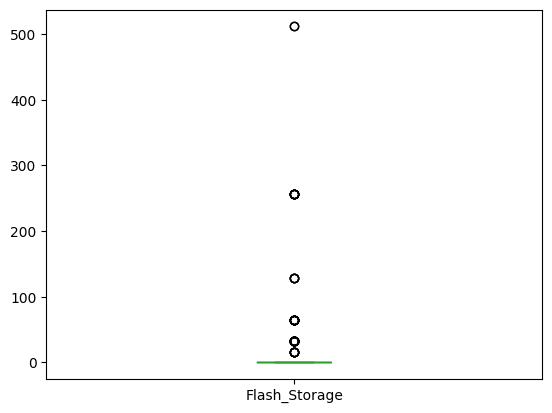

In [244]:
laptop_df['Flash_Storage'].plot.box()

In [245]:
laptop_df['Flash_Storage'].value_counts()

,count
Flash_Storage,
0,1196
32,36
64,15
256,8
16,7
128,4
512,2


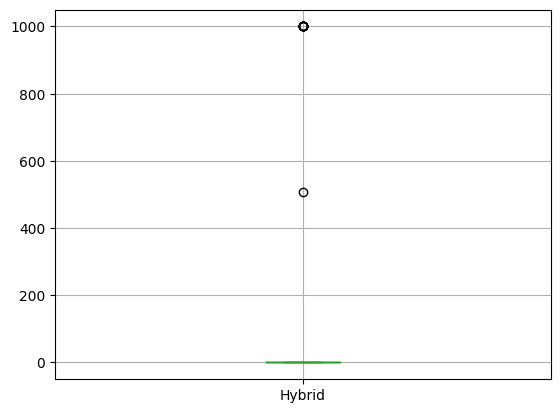

In [246]:
laptop_df['Hybrid'].plot.box()
plt.grid()


In [247]:
laptop_df[laptop_df['Hybrid']>500]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
145,151,Dell,Gaming,8,2.62,47898.7200,0,0,141.211998,Intel Core i7,0,0,1000,0,Nvidia,Windows
947,976,Lenovo,Notebook,4,1.70,53386.5600,0,0,111.935204,Intel Core i5,0,0,508,0,Intel,Windows
979,1010,Dell,Gaming,8,2.65,50562.7200,0,0,141.211998,Intel Core i5,0,0,1000,0,Nvidia,Windows
1049,1081,Lenovo,Gaming,32,4.60,172627.2000,0,1,127.335675,Intel Core i7,0,512,1000,0,Nvidia,Windows
1084,1116,Lenovo,Gaming,16,4.60,146519.4672,0,1,127.335675,Intel Core i7,0,256,1000,0,Nvidia,Windows
1103,1135,Lenovo,Notebook,16,2.50,58554.7200,0,0,141.211998,Intel Core i7,0,0,1000,0,AMD,Windows
1126,1158,Lenovo,Notebook,8,2.50,42010.7472,0,0,141.211998,Intel Core i5,0,0,1000,0,AMD,Windows
1144,1176,Lenovo,Notebook,4,2.32,43956.0000,0,0,141.211998,Intel Core i7,0,0,1000,0,Intel,Windows
1223,1258,Lenovo,Notebook,8,2.32,47685.6000,0,0,141.211998,Intel Core i7,0,0,1000,0,AMD,Windows
1231,1266,HP,Notebook,6,2.04,29303.4672,0,0,141.211998,AMD Processor,0,0,1000,0,AMD,Windows


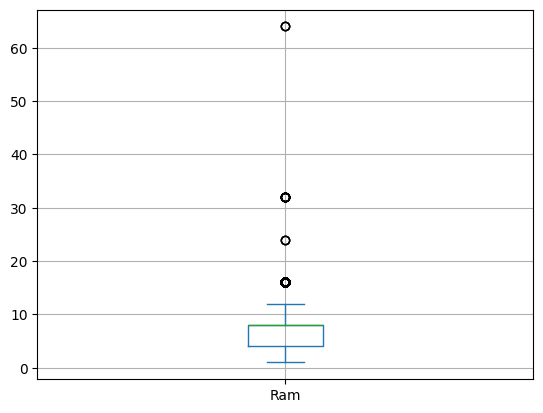

In [248]:
laptop_df['Ram'].plot.box()
plt.grid()

In [249]:
laptop_df[laptop_df['Ram']>60]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
68,71,Dell,Ultrabook,64,1.40,50882.4000,0,1,165.632118,Intel Core i7,0,256,0,0,AMD,Windows
699,720,Lenovo,Ultrabook,64,1.17,89864.1792,0,1,209.800683,Intel Core i7,0,512,0,0,Intel,Windows
1034,1066,Asus,Gaming,64,3.58,211788.0000,0,1,127.335675,Intel Core i7,0,1000,0,0,Nvidia,Windows


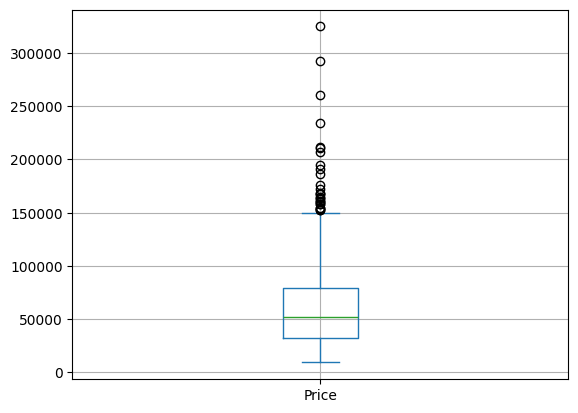

In [250]:
laptop_df['Price'].plot.box()
plt.grid()

In [251]:
laptop_df[laptop_df['Price']>300000]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
189,196,Razer,Gaming,32,3.49,324954.72,1,0,254.671349,Intel Core i7,0,1000,0,0,Nvidia,Windows


In [252]:
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   object 
 2   TypeName       1268 non-null   object 
 3   Ram            1268 non-null   int64  
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   int64  
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   object 
 10  HDD            1268 non-null   int64  
 11  SSD            1268 non-null   int64  
 12  Hybrid         1268 non-null   int64  
 13  Flash_Storage  1268 non-null   int64  
 14  Gpu brand      1268 non-null   object 
 15  os             1268 non-null   object 
dtypes: float64(3), int64(8), object(5)
memory usage: 158.6+ KB


In [253]:
laptop_df['HDD'] = laptop_df['HDD'].astype('object')
laptop_df['Ram'] = laptop_df['Ram'].astype('object')
laptop_df['Touchscreen'] = laptop_df['Touchscreen'].astype('object')
laptop_df['SSD'] = laptop_df['SSD'].astype('object')
laptop_df['Flash_Storage'] = laptop_df['Flash_Storage'].astype('object')
laptop_df['Hybrid'] = laptop_df['Hybrid'].astype('object')

In [254]:
laptop_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1268 non-null   int64  
 1   Company        1268 non-null   object 
 2   TypeName       1268 non-null   object 
 3   Ram            1268 non-null   object 
 4   Weight         1268 non-null   float64
 5   Price          1268 non-null   float64
 6   Touchscreen    1268 non-null   object 
 7   Ips            1268 non-null   int64  
 8   ppi            1268 non-null   float64
 9   Cpu brand      1268 non-null   object 
 10  HDD            1268 non-null   object 
 11  SSD            1268 non-null   object 
 12  Hybrid         1268 non-null   object 
 13  Flash_Storage  1268 non-null   object 
 14  Gpu brand      1268 non-null   object 
 15  os             1268 non-null   object 
dtypes: float64(3), int64(2), object(11)
memory usage: 158.6+ KB


In [255]:
laptop_df['Ips'] = laptop_df['Ips'].astype('object')

##EDA

In [256]:
laptop_df.columns

Index(['index', 'Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'ppi', 'Cpu brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Gpu brand', 'os'],
      dtype='object')

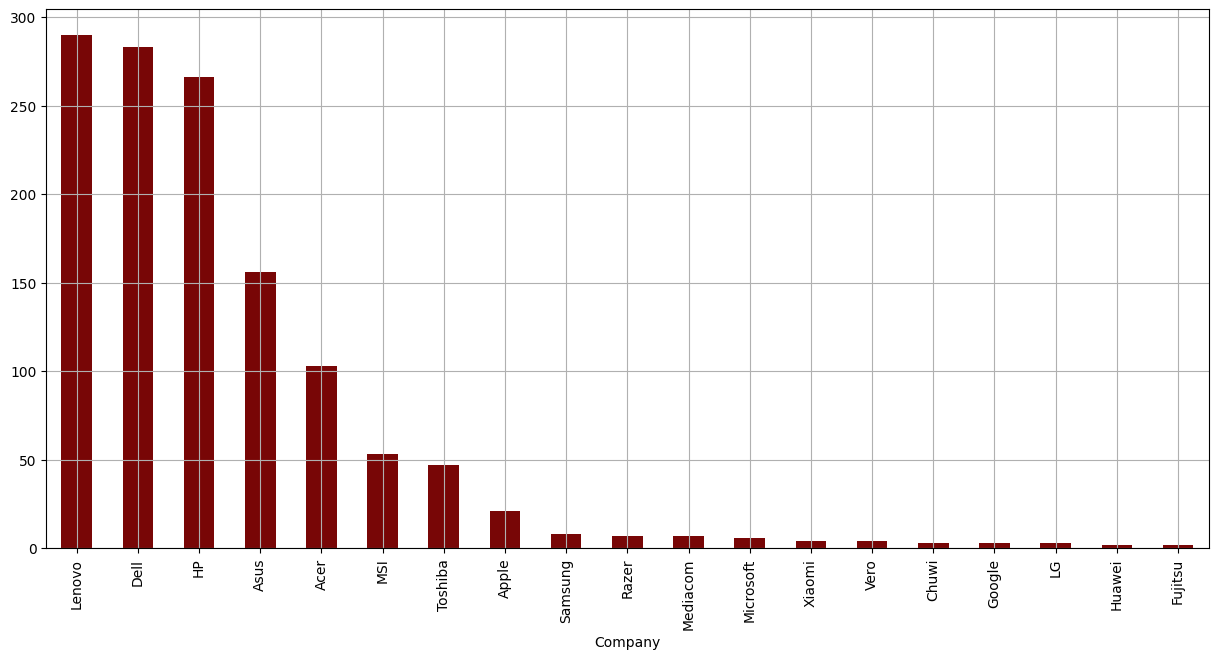

In [257]:
plt.figure(figsize  = (15,7))
laptop_df['Company'].value_counts().plot.bar(color='#780606')
plt.grid()

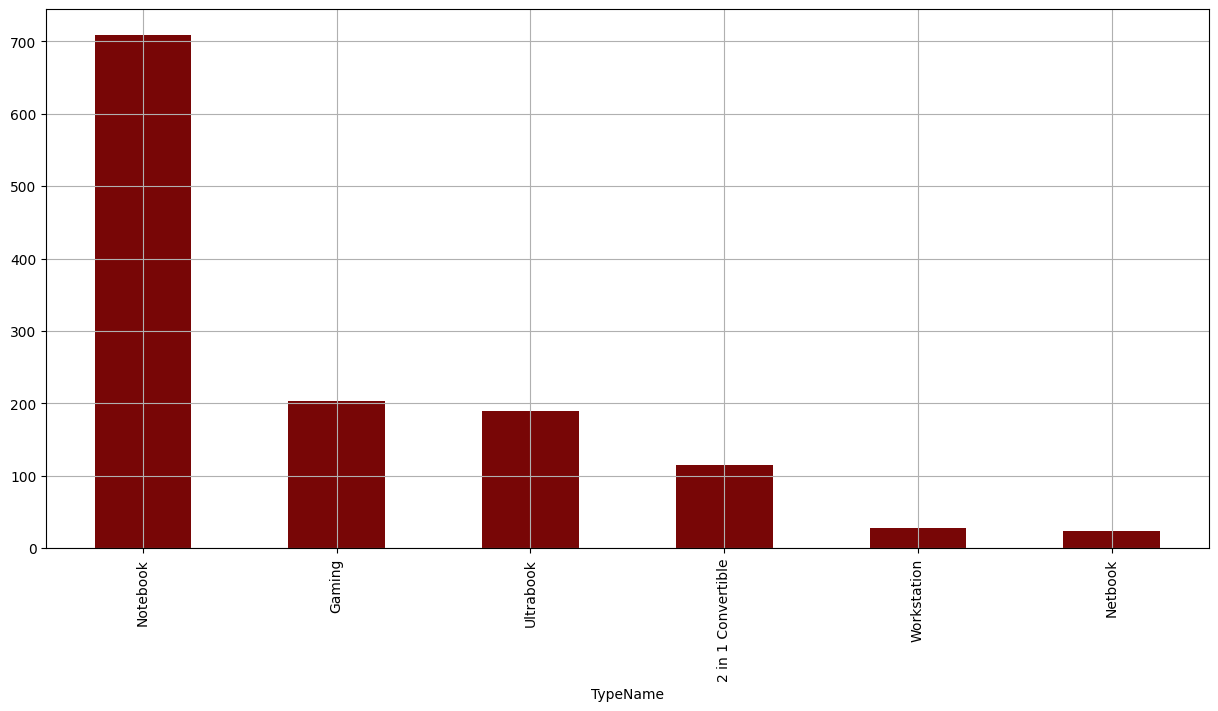

In [258]:
plt.figure(figsize  = (15,7))
laptop_df['TypeName'].value_counts().plot.bar(color='#780606')
plt.grid()

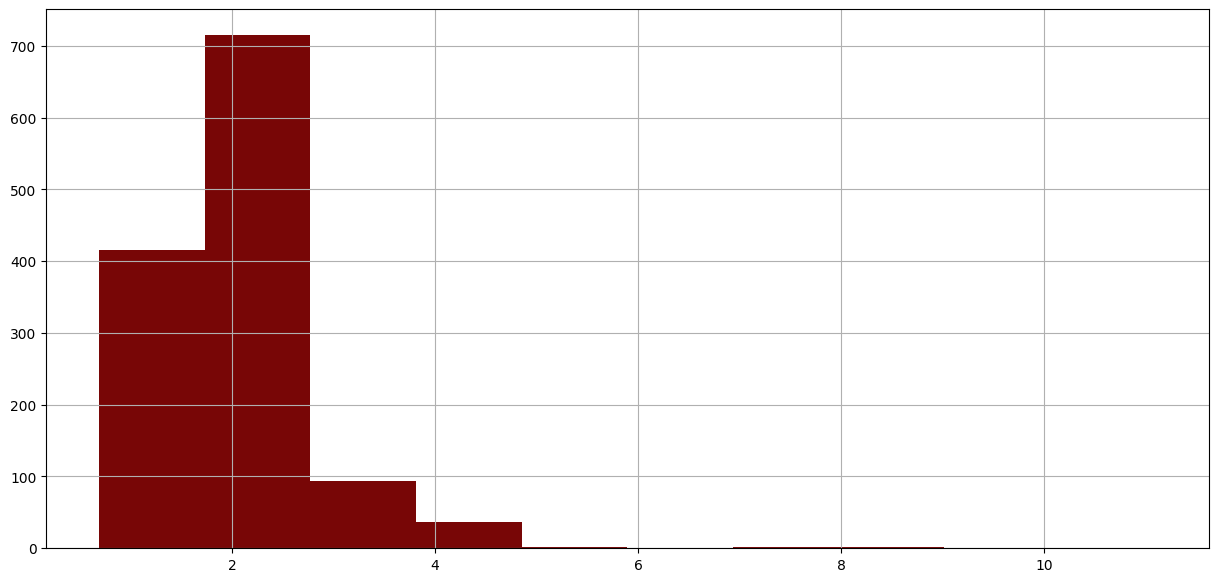

In [259]:
plt.figure(figsize  = (15,7))
plt.hist(laptop_df['Weight'] ,color='#780606')
plt.grid()

In [260]:
laptop_df.loc[laptop_df['Weight'] > 4, 'Weight'] = laptop_df['Weight'].median()

In [261]:
laptop_df[laptop_df['Weight'] > 4]

,index,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os


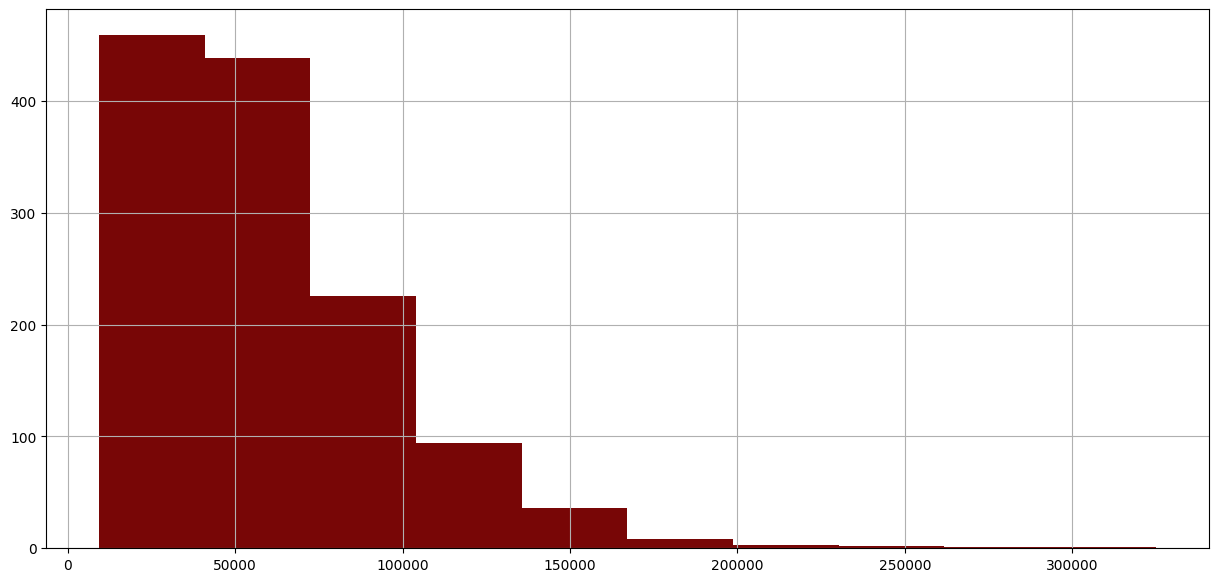

In [262]:
plt.figure(figsize  = (15,7))
plt.hist(laptop_df['Price'] ,color='#780606')
plt.grid()

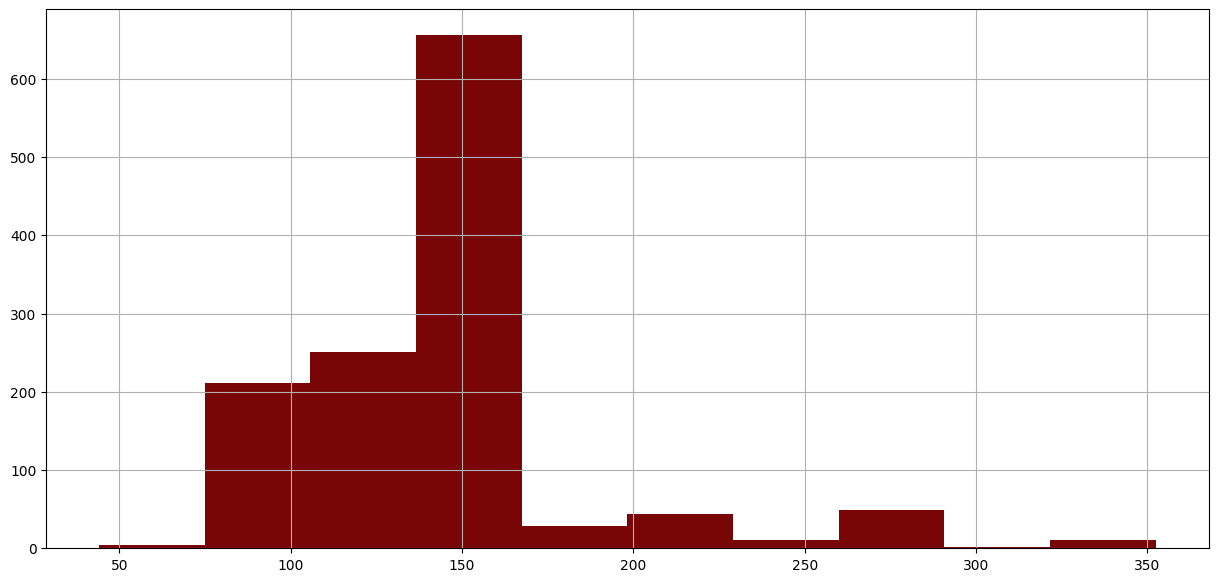

In [263]:
plt.figure(figsize  = (15,7))
plt.hist(laptop_df['ppi'] ,color='#780606')
plt.grid()

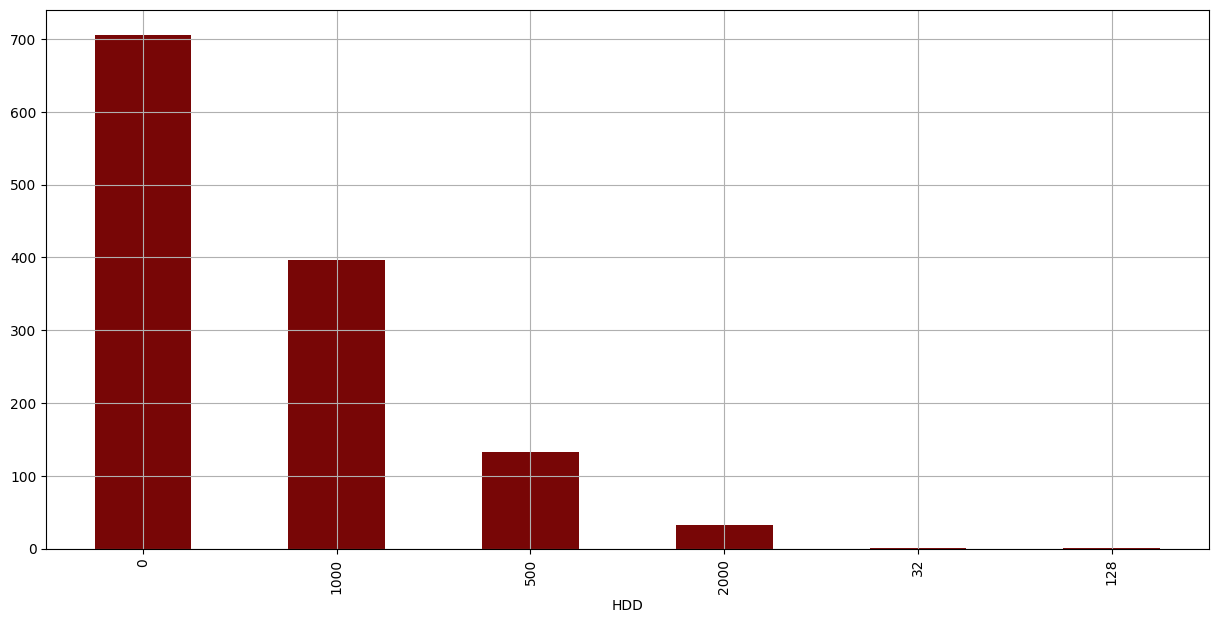

In [264]:
plt.figure(figsize  = (15,7))
laptop_df['HDD'].value_counts().plot.bar(color='#780606')
plt.grid()

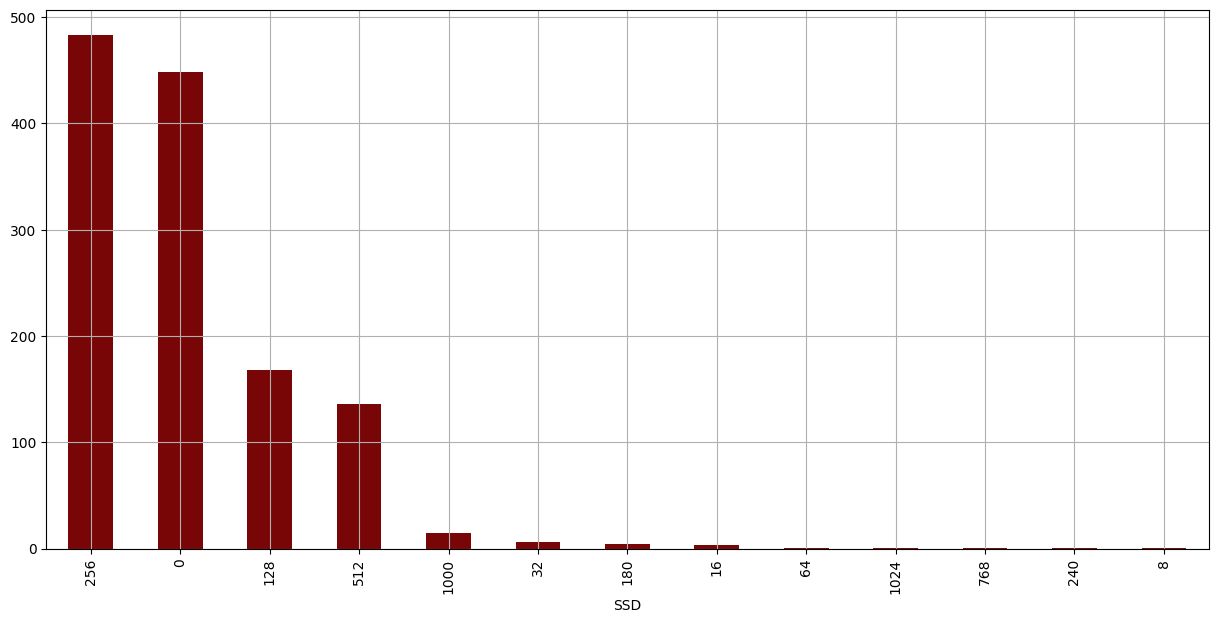

In [265]:
plt.figure(figsize  = (15,7))
laptop_df['SSD'].value_counts().plot.bar(color='#780606')
plt.grid()

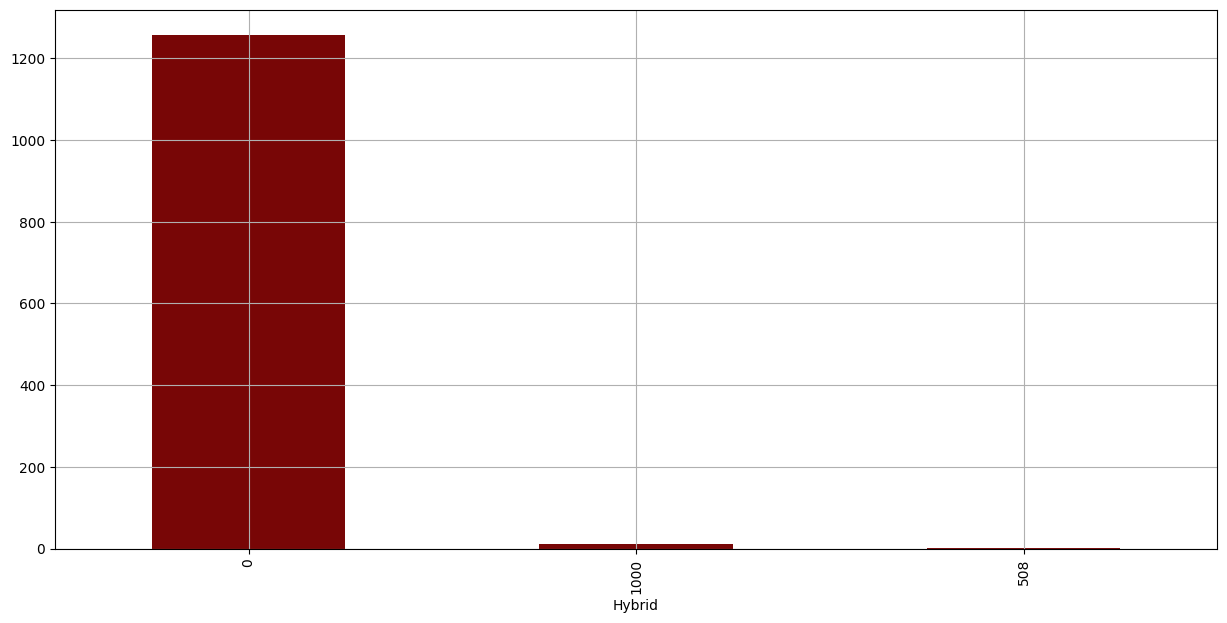

In [266]:
plt.figure(figsize  = (15,7))
laptop_df['Hybrid'].value_counts().plot.bar(color='#780606')
plt.grid()

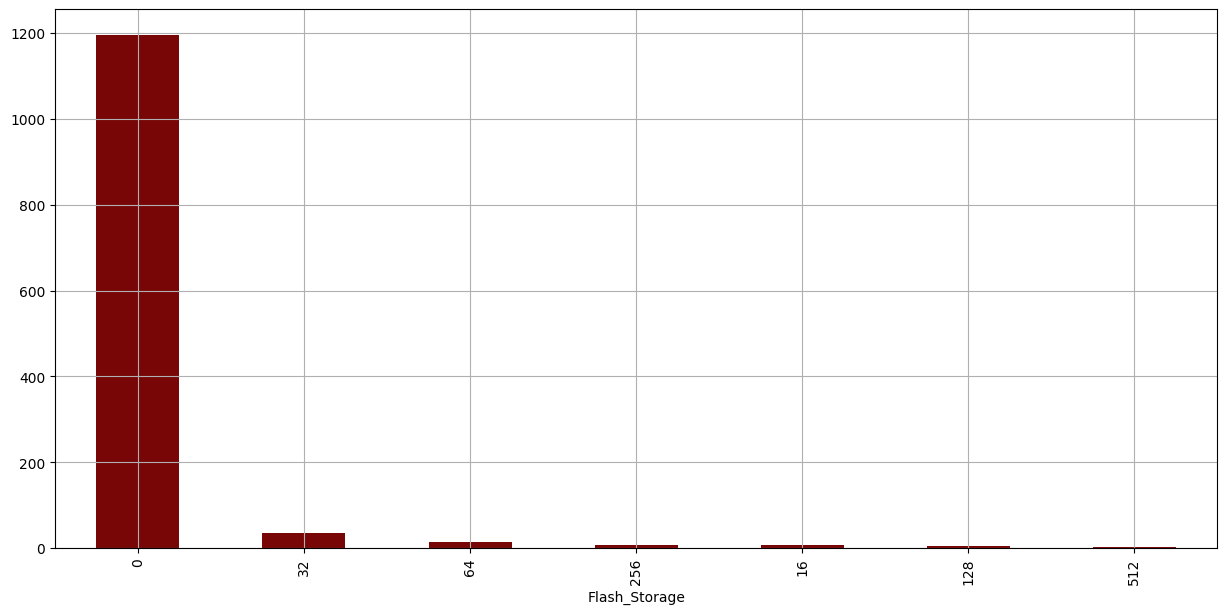

In [267]:
plt.figure(figsize  = (15,7))
laptop_df['Flash_Storage'].value_counts().plot.bar(color='#780606')
plt.grid()

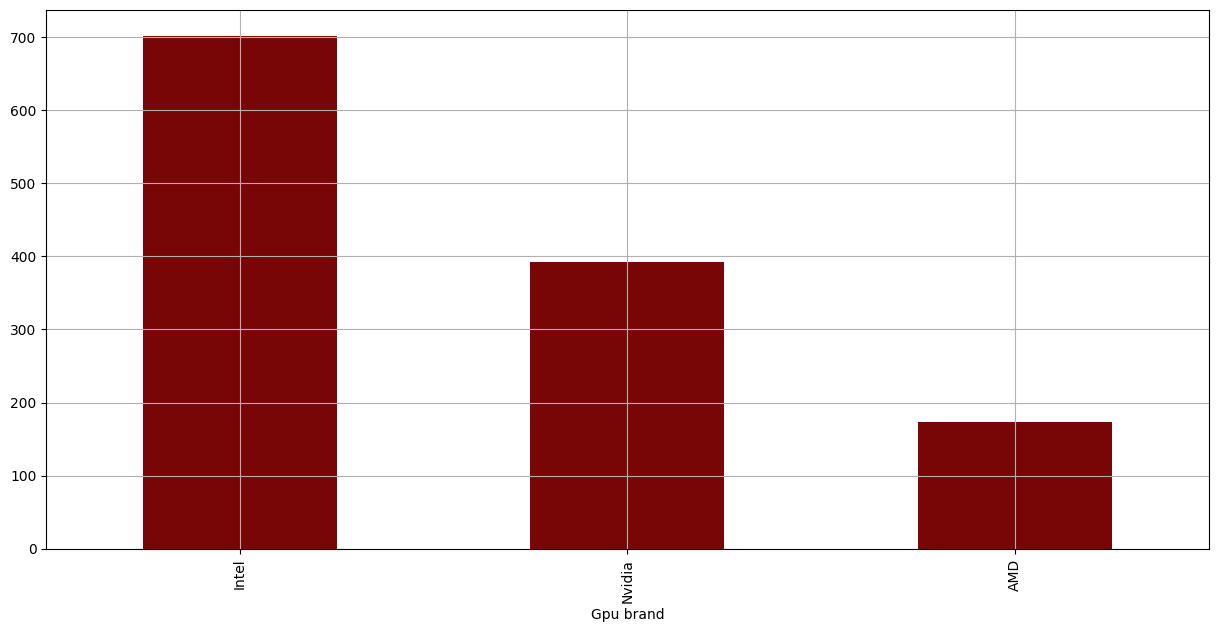

In [268]:
plt.figure(figsize  = (15,7))
laptop_df['Gpu brand'].value_counts().plot.bar(color='#780606')
plt.grid()

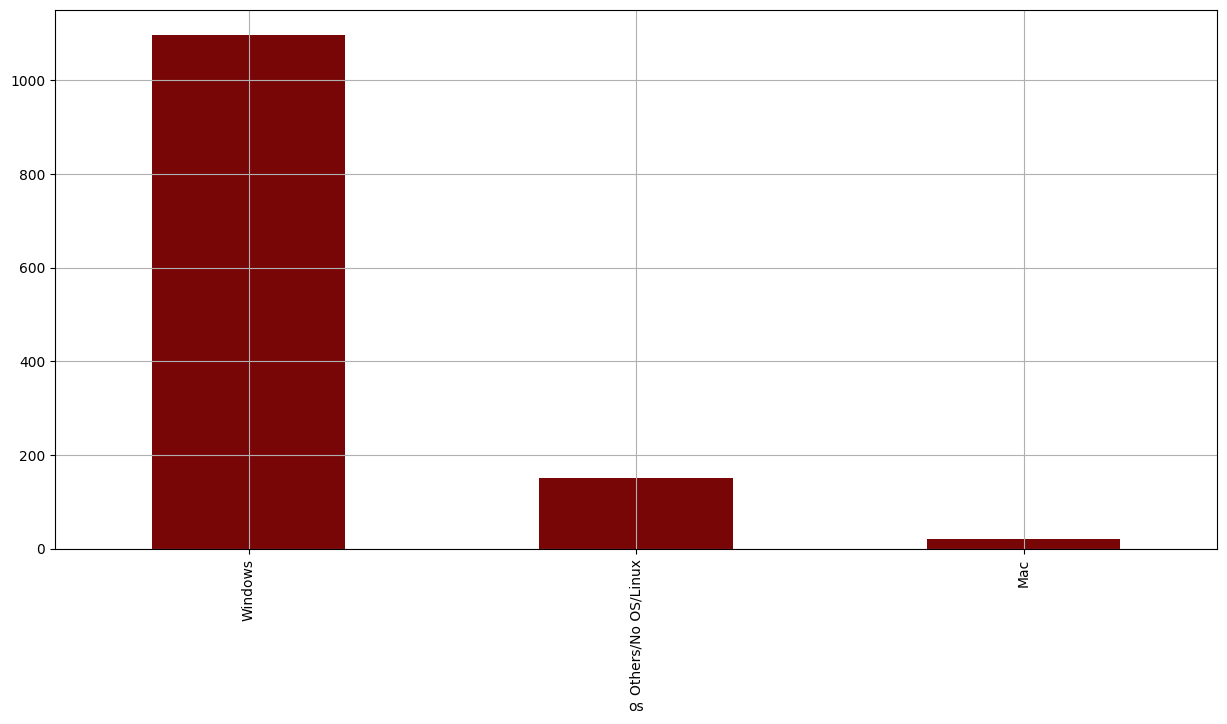

In [269]:
plt.figure(figsize  = (15,7))
laptop_df['os'].value_counts().plot.bar(color='#780606')
plt.grid()

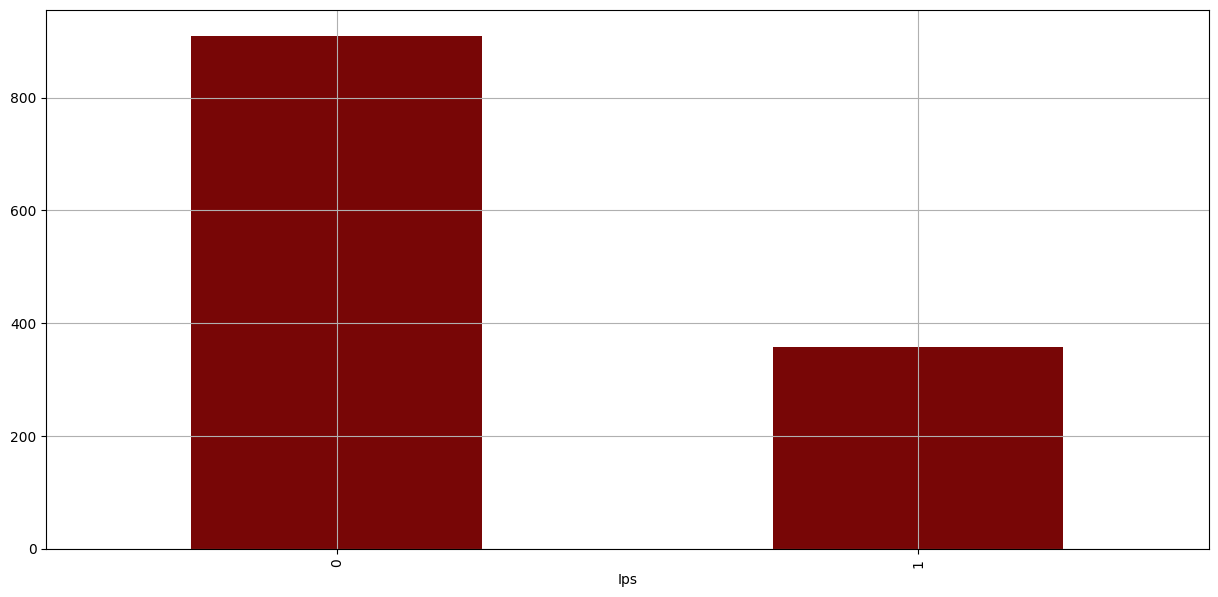

In [270]:
plt.figure(figsize  = (15,7))
laptop_df['Ips'].value_counts().plot.bar(color='#780606')
plt.grid()

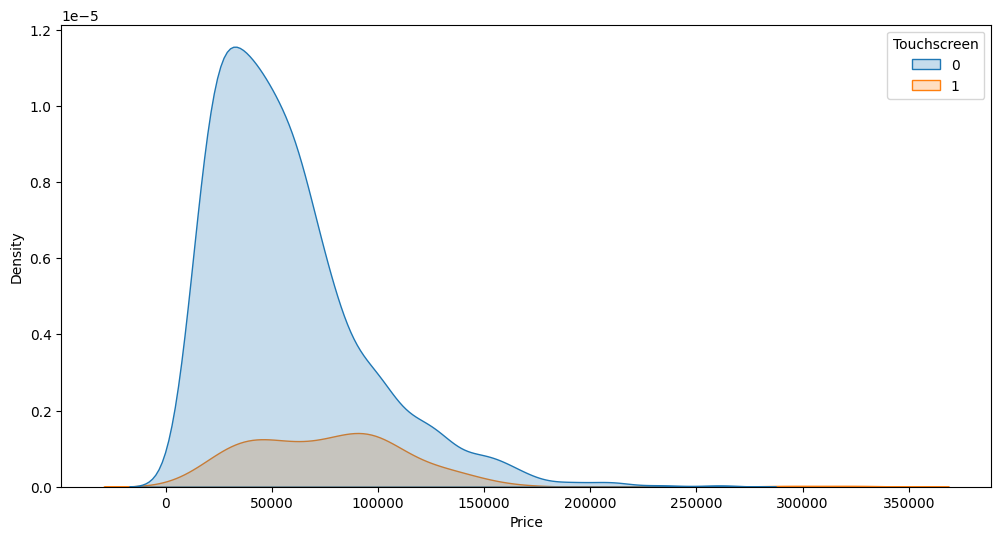

In [271]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=laptop_df, x='Price',hue='Touchscreen',fill=True)
plt.show()

In [272]:
laptop_df['Weight'].median()

2.04

In [273]:
laptop_df.columns

Index(['index', 'Company', 'TypeName', 'Ram', 'Weight', 'Price', 'Touchscreen',
       'Ips', 'ppi', 'Cpu brand', 'HDD', 'SSD', 'Hybrid', 'Flash_Storage',
       'Gpu brand', 'os'],
      dtype='object')

<ipython-input-274-beacd85a3635>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cpu brand',y='Price',data=laptop_df,palette='rainbow')


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000'),
  Text(0, 300000.0, '300000'),
  Text(0, 350000.0, '350000')])

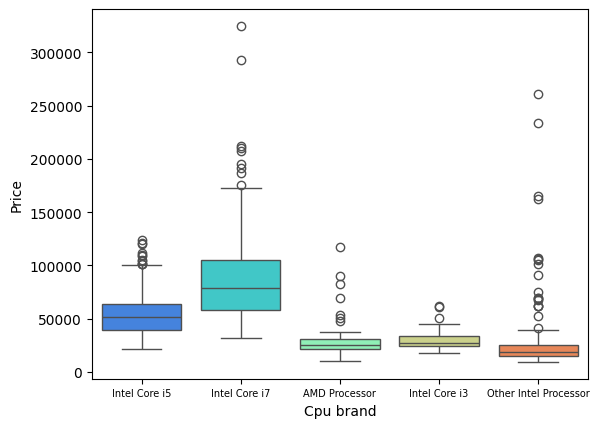

In [274]:
sns.boxplot(x='Cpu brand',y='Price',data=laptop_df,palette='rainbow')
plt.xticks(size=7)
plt.yticks(size=10)

<ipython-input-275-e22d78d1a13e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TypeName',y='Price',data=laptop_df,palette='rainbow')


(array([-50000.,      0.,  50000., 100000., 150000., 200000., 250000.,
        300000., 350000.]),
 [Text(0, -50000.0, '−50000'),
  Text(0, 0.0, '0'),
  Text(0, 50000.0, '50000'),
  Text(0, 100000.0, '100000'),
  Text(0, 150000.0, '150000'),
  Text(0, 200000.0, '200000'),
  Text(0, 250000.0, '250000'),
  Text(0, 300000.0, '300000'),
  Text(0, 350000.0, '350000')])

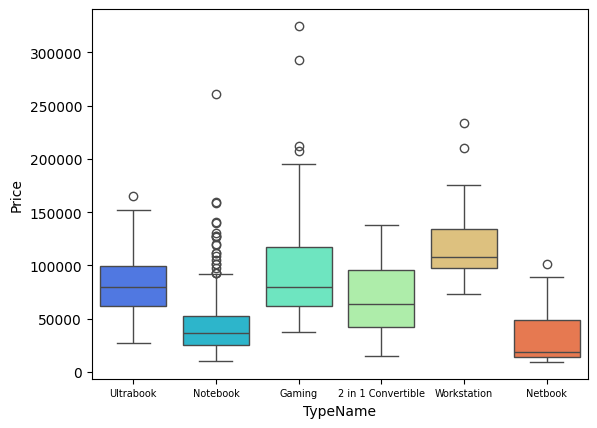

In [275]:
sns.boxplot(x='TypeName',y='Price',data=laptop_df,palette='rainbow')
plt.xticks(size=7)
plt.yticks(size=10)

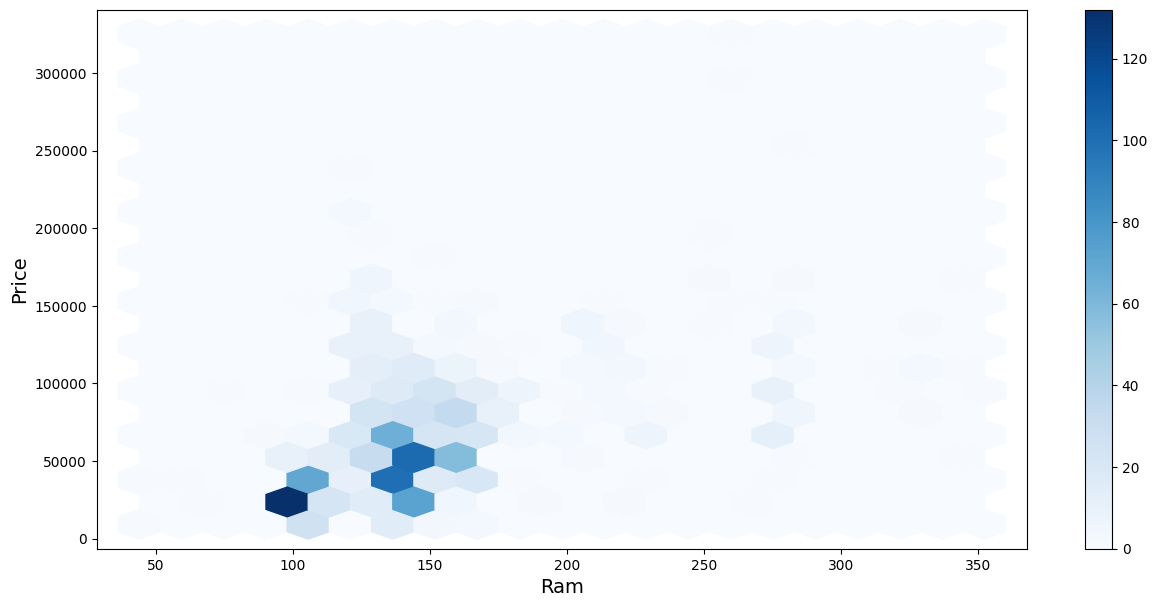

In [276]:
laptop_df.plot.hexbin(x='ppi', y='Price', gridsize=20, sharex=False , figsize = (15,7), cmap='Blues')
plt.xlabel(xlabel='Ram', size=14)
plt.ylabel(ylabel='Price', size=14)
plt.show()


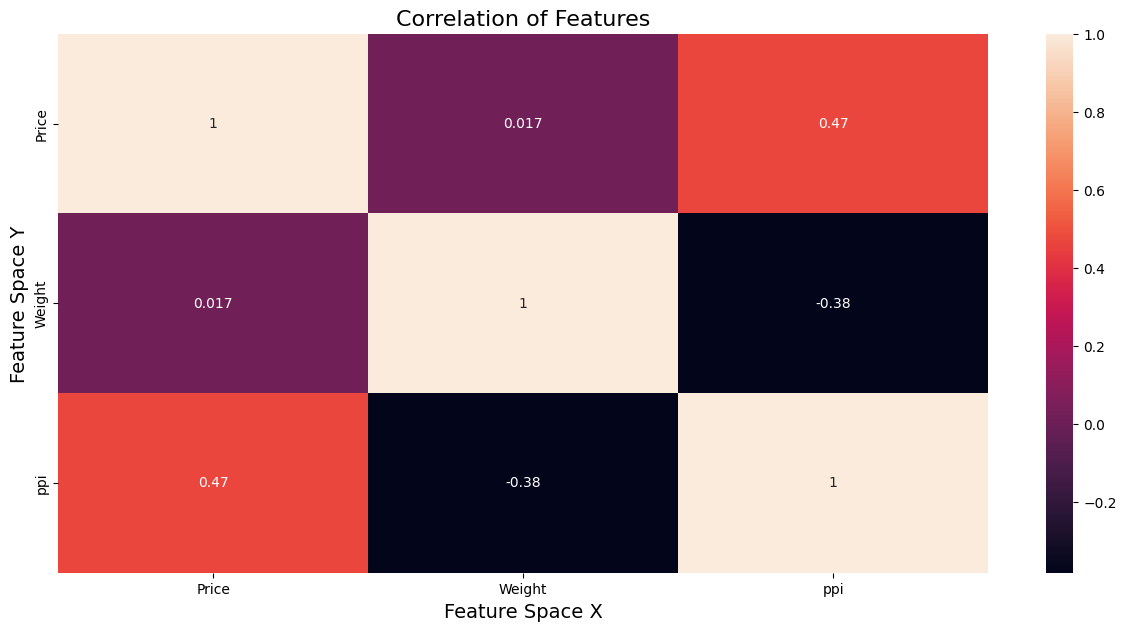

In [277]:
df1 = laptop_df[['Price','Weight','ppi']]
corr_matrix = df1.corr()

plt.figure(figsize = (15,7))
corr_matrix = df1.corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

9 Splitting Dataset into Dependent variable and Independent variabl

In [278]:
#Now will split our dataset into Dependent variable and Independent variable
y = laptop_df['Price']
X = laptop_df.drop(columns='Price')

In [279]:
X.shape

(1268, 15)

In [280]:
X.head()

,index,Company,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


In [281]:
X.drop(['index','Company'], axis = 1, inplace = True)

In [282]:
X.head()

,TypeName,Ram,Weight,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
0,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac


# 8 Train Test Split

In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state = 42)


print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (1014, 13)
Shape of X_test = (254, 13)
Shape of y_train = (1014,)
Shape of y_test = (254,)


categorical & continues split

In [284]:
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cont = X_train.select_dtypes(exclude=['object'])

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cont = X_test.select_dtypes(exclude=['object'])

In [285]:
X_train_cat

,TypeName,Ram,Touchscreen,Ips,Cpu brand,HDD,SSD,Hybrid,Flash_Storage,Gpu brand,os
32,Ultrabook,16,1,0,Intel Core i7,0,512,0,0,Intel,Windows
156,Notebook,8,0,0,Intel Core i5,0,256,0,0,AMD,Windows
723,Notebook,2,0,0,Other Intel Processor,0,0,0,32,Intel,Others/No OS/Linux
964,Notebook,8,0,0,Intel Core i5,0,256,0,0,Intel,Windows
277,Ultrabook,8,0,0,Intel Core i5,0,256,0,0,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...
1044,Notebook,4,0,1,Intel Core i5,1000,0,0,0,Nvidia,Windows
1095,Ultrabook,8,0,0,Intel Core i5,0,256,0,0,Intel,Windows
1130,Gaming,8,0,1,Intel Core i7,1000,0,0,0,Nvidia,Windows
860,Notebook,4,0,0,Intel Core i3,1000,0,0,0,AMD,Others/No OS/Linux


In [286]:
X_train_cont

,Weight,ppi
32,1.20,276.053530
156,2.13,141.211998
723,1.68,111.935204
964,1.40,276.053530
277,1.70,141.211998
...,...,...
1044,2.30,141.211998
1095,1.26,125.367428
1130,2.62,141.211998
860,2.18,100.454670


#encoding

In [287]:
from sklearn.preprocessing import OneHotEncoder

drop_enc = OneHotEncoder(drop='first', sparse_output = False,handle_unknown='ignore')
drop_enc.fit(X_train_cat)

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [288]:
drop_enc.categories_

[array(['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook',
        'Workstation'], dtype=object),
 array([1, 2, 4, 6, 8, 12, 16, 24, 32, 64], dtype=object),
 array([0, 1], dtype=object),
 array([0, 1], dtype=object),
 array(['AMD Processor', 'Intel Core i3', 'Intel Core i5', 'Intel Core i7',
        'Other Intel Processor'], dtype=object),
 array([0, 32, 128, 500, 1000, 2000], dtype=object),
 array([0, 16, 32, 64, 128, 180, 240, 256, 512, 768, 1000, 1024],
       dtype=object),
 array([0, 508, 1000], dtype=object),
 array([0, 16, 32, 64, 128, 256, 512], dtype=object),
 array(['AMD', 'Intel', 'Nvidia'], dtype=object),
 array(['Mac', 'Others/No OS/Linux', 'Windows'], dtype=object)]

In [289]:
drop_enc.get_feature_names_out(X_train_cat.columns)

array(['TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'Ram_2', 'Ram_4',
       'Ram_6', 'Ram_8', 'Ram_12', 'Ram_16', 'Ram_24', 'Ram_32', 'Ram_64',
       'Touchscreen_1', 'Ips_1', 'Cpu brand_Intel Core i3',
       'Cpu brand_Intel Core i5', 'Cpu brand_Intel Core i7',
       'Cpu brand_Other Intel Processor', 'HDD_32', 'HDD_128', 'HDD_500',
       'HDD_1000', 'HDD_2000', 'SSD_16', 'SSD_32', 'SSD_64', 'SSD_128',
       'SSD_180', 'SSD_240', 'SSD_256', 'SSD_512', 'SSD_768', 'SSD_1000',
       'SSD_1024', 'Hybrid_508', 'Hybrid_1000', 'Flash_Storage_16',
       'Flash_Storage_32', 'Flash_Storage_64', 'Flash_Storage_128',
       'Flash_Storage_256', 'Flash_Storage_512', 'Gpu brand_Intel',
       'Gpu brand_Nvidia', 'os_Others/No OS/Linux', 'os_Windows'],
      dtype=object)

In [290]:
X_train_OHE = drop_enc.transform(X_train_cat)
X_test_OHE = drop_enc.transform(X_test_cat)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [291]:
X_train_OHE

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [292]:
X_train_OHE_DF = pd.DataFrame(X_train_OHE, columns = drop_enc.get_feature_names_out(X_train_cat.columns), index = X_train_cat.index)
X_test_OHE_DF = pd.DataFrame(X_test_OHE, columns = drop_enc.get_feature_names_out(X_train_cat.columns), index = X_test_cat.index)

In [293]:
X_train_OHE_DF

,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Ram_2,Ram_4,Ram_6,Ram_8,Ram_12,...,Flash_Storage_16,Flash_Storage_32,Flash_Storage_64,Flash_Storage_128,Flash_Storage_256,Flash_Storage_512,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
723,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
964,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1095,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
860,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#Scaling

In [294]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_cont)

StandardScaler()

In [295]:
X_train_S = scaler.transform(X_train_cont)
X_test_S = scaler.transform(X_test_cont)

In [296]:
X_train_S_DF = pd.DataFrame(X_train_S, columns = (X_train_cont.columns + '_S'), index = X_train_cont.index)
X_test_S_DF = pd.DataFrame(X_test_S, columns = (X_train_cont.columns + '_S'), index = X_test_cont.index)

In [297]:
X_train_S_DF

,Weight_S,ppi_S
32,-1.405497,2.937800
156,0.285148,-0.136212
723,-0.532906,-0.803641
964,-1.041918,2.937800
277,-0.496548,-0.136212
...,...,...
1044,0.594191,-0.136212
1095,-1.296423,-0.497424
1130,1.175919,-0.136212
860,0.376043,-1.065365


#Concatination

In [298]:
#combining cat and cont data in train and test respectively

X_train_comb = pd.concat([X_train_OHE_DF,X_train_S_DF],axis = 1)
X_test_comb = pd.concat([X_test_OHE_DF,X_test_S_DF],axis = 1)

In [299]:
X_train_comb

,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Ram_2,Ram_4,Ram_6,Ram_8,Ram_12,...,Flash_Storage_64,Flash_Storage_128,Flash_Storage_256,Flash_Storage_512,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows,Weight_S,ppi_S
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.405497,2.937800
156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.285148,-0.136212
723,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.532906,-0.803641
964,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.041918,2.937800
277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.496548,-0.136212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.594191,-0.136212
1095,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.296423,-0.497424
1130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.175919,-0.136212
860,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.376043,-1.065365


# Dimensionality Reduction

In [300]:
from sklearn.decomposition import PCA
pca = PCA()

pca.fit(X_train_comb)

PCA()

In [301]:
(pd.Series(np.cumsum(pca.explained_variance_ratio_)) <= 0.90).sum()

13

In [302]:
pd.Series(np.cumsum(pca.explained_variance_ratio_))

,0
0,0.291468
1,0.482105
2,0.564120
3,0.628288
4,0.671046
5,0.710135
6,0.744986
7,0.775590
8,0.804327
9,0.829659


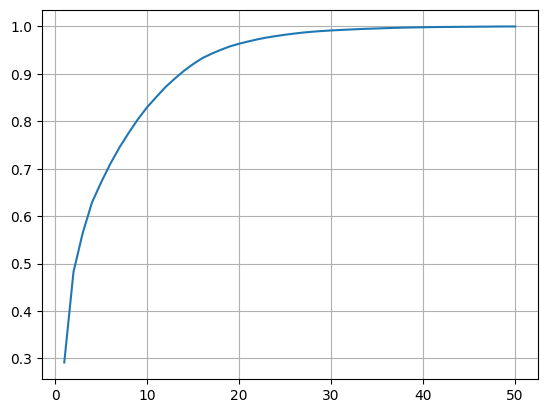

In [303]:
plt.plot(pd.Series(np.cumsum(pca.explained_variance_ratio_), index = range(1,51)))
plt.grid()

In [304]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 15)

# Fit PCA on the training data
pca1.fit(X_train_comb)

PCA(n_components=15)

In [305]:
cols = 'P' + pd.Series(range(1,16)).astype(str)

In [306]:
x_train_pca = pd.DataFrame(data = pca1.transform(X_train_comb),
            index = X_train_comb.index,
            columns = cols)

In [307]:
x_train_pca.head()

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15
32,-3.145615,1.461513,-1.352744,0.284493,0.282236,-0.186488,0.362400,-0.088328,-0.709867,0.481755,-0.292652,0.355325,0.187680,-0.004314,-0.185054
156,0.243596,-0.199912,1.182891,0.510665,0.359318,-0.163571,0.048514,-0.367037,0.000487,0.124770,0.134204,-0.005412,0.003835,0.016544,-0.267876
723,0.068489,-1.429991,-0.570509,-0.283032,-0.575030,-0.895058,-0.597644,0.087068,-0.033165,0.121913,0.944152,0.437321,-0.308301,0.390399,-0.355853
964,-2.638937,0.681734,0.600116,1.738944,0.227459,-0.348375,0.196172,-0.644257,-0.132843,-0.257822,0.022524,0.180227,-0.334595,0.137164,0.310283
277,-0.406503,0.114434,1.151632,-0.413891,-0.037520,0.278774,-0.500444,-0.729945,-0.269682,0.370427,-0.092118,-0.589476,-0.152337,-0.513097,-0.429737


In [308]:
x_test_pca = pd.DataFrame(data = pca1.transform(X_test_comb),
            index = X_test_comb.index,
            columns = cols)

Checking Assumptions

Normalty

<ipython-input-309-34f1dc3e7a15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train)


<Axes: xlabel='Price', ylabel='Density'>

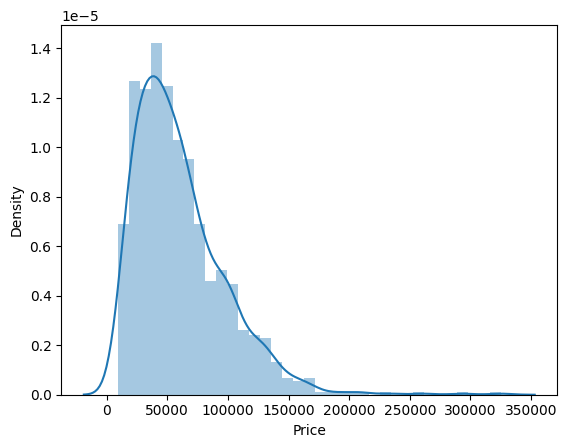

In [309]:
sns.distplot(y_train)

<ipython-input-310-0db0a01d2ca3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(y_train))


<Axes: xlabel='Price', ylabel='Density'>

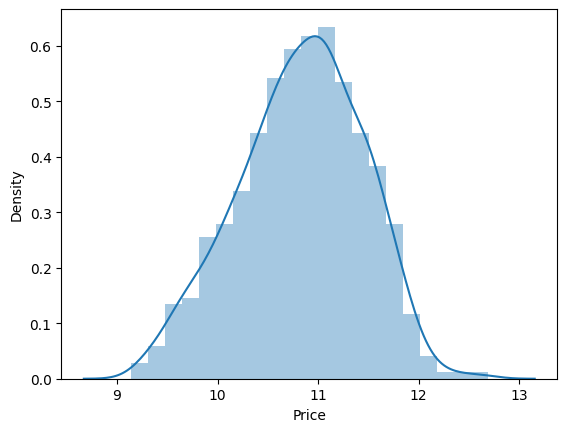

In [310]:
sns.distplot(np.log(y_train))

In [311]:
tv_train = np.log(y_train)
tv_test = np.log(y_test)

#MULTI-COLLINEARITY

In [312]:
X_train_comb

,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation,Ram_2,Ram_4,Ram_6,Ram_8,Ram_12,...,Flash_Storage_64,Flash_Storage_128,Flash_Storage_256,Flash_Storage_512,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows,Weight_S,ppi_S
32,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.405497,2.937800
156,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.285148,-0.136212
723,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-0.532906,-0.803641
964,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.041918,2.937800
277,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-0.496548,-0.136212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.594191,-0.136212
1095,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.296423,-0.497424
1130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.175919,-0.136212
860,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.376043,-1.065365


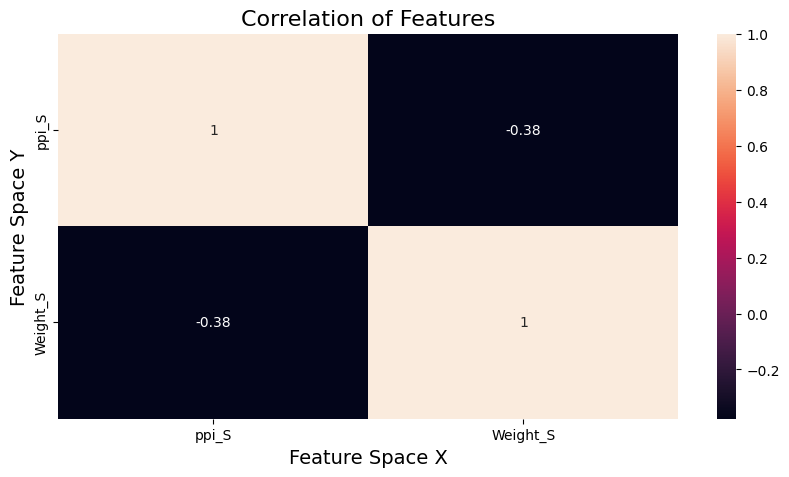

In [313]:
df2 = X_train_comb[['ppi_S','Weight_S']]
corr_matrix = df2.corr()

plt.figure(figsize = (10,5))
corr_matrix = df2.corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True)
plt.xlabel(xlabel='Feature Space X', size=14)
plt.ylabel(ylabel='Feature Space Y', size=14)
plt.title(label='Correlation of Features', size=16)
plt.show()

#LINEARITY

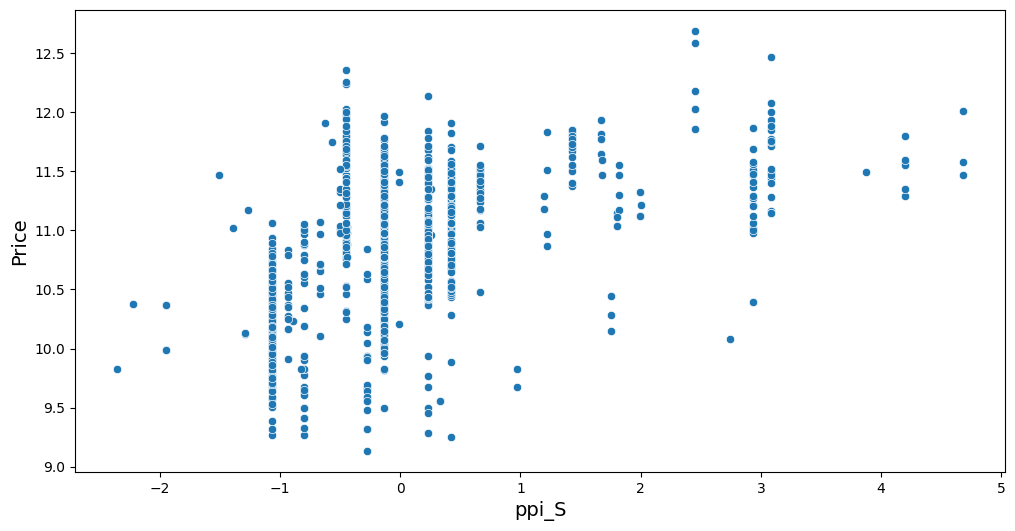

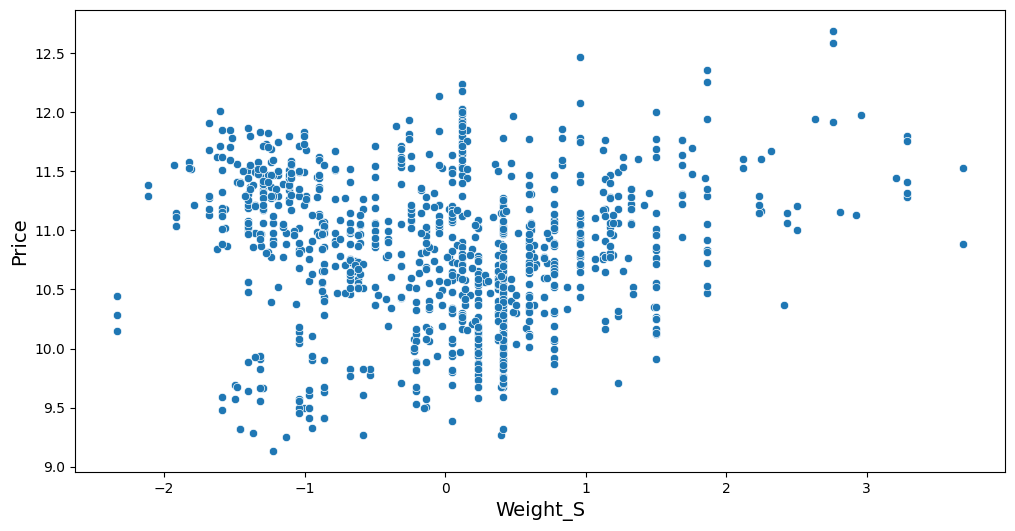

In [314]:
cols = df2.columns

for col in cols:
  plt.figure(figsize=(12, 6))
  sns.scatterplot(x=df2[col], y=tv_train)
  plt.xlabel(xlabel=col, size=14)
  plt.ylabel(ylabel='Price', size=14)
  plt.show()

# ML Modeliing

In [315]:
x_train_pca.shape

(1014, 15)

In [316]:
x_train_pca.isnull().sum()

,0
P1,0
P2,0
P3,0
P4,0
P5,0
P6,0
P7,0
P8,0
P9,0
P10,0


##Linear regression

In [317]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_train_pca,y_train)

#Print out the coefficients of the model
print('Coefficients: \n', lm.coef_)
print('Intercept: \n', lm.intercept_)

Coefficients: 
 [-0.12218274  0.41189418  0.16966768 -0.1725147   0.19958846  0.18610263
  0.07172825 -0.02085248 -0.1663499   0.27934204 -0.31846242  0.06545251
  0.06597968  0.12268835  0.18632164]
Intercept: 
 10.827563460423354


In [318]:
print('Intercept: \n', lm.intercept_)
pd.Series(data = lm.coef_, index = x_train_pca.columns)

Intercept: 
 10.827563460423354


,0
P1,-0.122183
P2,0.411894
P3,0.169668
P4,-0.172515
P5,0.199588
P6,0.186103
P7,0.071728
P8,-0.020852
P9,-0.166350
P10,0.279342


In [319]:
S2 = pd.Series(index = (x_train_pca.columns), data = lm.coef_)
S1 = pd.Series(index = ['intercept'], data = lm.intercept_)

pd.concat([S1,S2])

,0
intercept,10.827563
P1,-0.122183
P2,0.411894
P3,0.169668
P4,-0.172515
P5,0.199588
P6,0.186103
P7,0.071728
P8,-0.020852
P9,-0.166350


In [320]:
TV_train_predict = lm.predict(x_train_pca)
TV_test_predict = lm.predict(x_test_pca)

In [321]:
y_train_pred = np.exp(TV_train_predict)
y_test_pred = np.exp(TV_test_predict)

##KNN regressor

In [354]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=11)

In [355]:
knn.fit(x_train_pca, y_train)

KNeighborsRegressor(n_neighbors=11)

In [356]:
y_test_pred_knn = knn.predict(x_test_pca)

In [357]:
y_test_pred_knn

array([116621.83112727,  17319.87490909,  80563.71927273,  51578.43054545,
        60937.78909091,  36484.64247273,  79790.14210909,  34651.32610909,
        51182.22109091,  58917.99272727,  21770.69236364,  18632.93629091,
        66875.31229091,  56941.69221818,  38642.14341818,  31280.05832727,
        61447.53338182,  81265.27156364,  31812.13178182,  98205.21163636,
        31814.74734545,  55119.56465455,  17538.32290909,  64397.11418182,
        14375.91272727,  49240.35883636,  65311.59272727,  74347.00887273,
       128939.44058182,  58884.5232    ,  13263.08727273, 116174.61818182,
        57682.42952727,  28913.9904    ,  77838.3504    ,  44741.73469091,
        16885.98196364,  50557.44043636,  99250.95272727,  83446.99069091,
        22326.79025455,  58462.69090909,  56317.54123636, 118184.72727273,
        70153.04945455,  27363.44552727,  77044.62370909,  23024.17701818,
        99575.47636364, 114054.70385455,  27382.33570909,  86281.72887273,
        40730.08974545,  

In [358]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

lst1 = []

for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(x_train_pca, y_train)

    y_test_pred_knn = knn.predict(x_test_pca)
    y_train_pred_knn = knn.predict(x_train_pca)

    mse = mean_squared_error(y_test_pred_knn, y_test)
    rmse = np.sqrt(mse)

    lst1.append([k,rmse])

In [359]:
data1 = np.array(lst1)

In [360]:
df = pd.DataFrame(data1, columns = ['k', 'rmse'])

<Axes: xlabel='k', ylabel='rmse'>

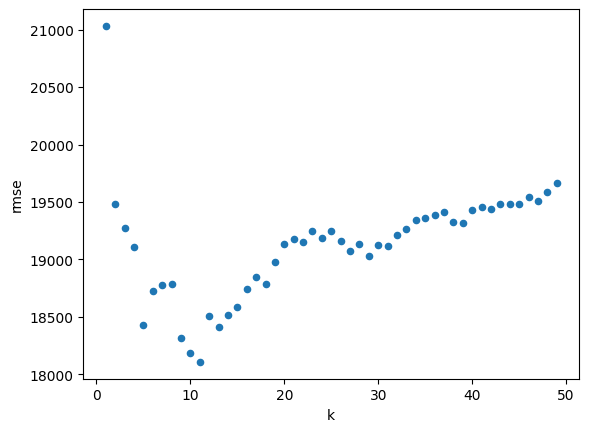

In [361]:
df.plot.scatter(x = 'k', y = 'rmse')

##Random forest

In [331]:
from sklearn.tree import DecisionTreeRegressor

In [332]:
DTC = DecisionTreeRegressor()
DTC.fit(x_train_pca , y_train)

DecisionTreeRegressor()

In [335]:
print('R2 Score:', r2_score(DTC.predict(x_train_pca), y_train))

R2 Score: 0.9905953593936444


In [336]:
print('R2 Score:', r2_score(DTC.predict(x_test_pca), y_test))

R2 Score: 0.5416997256629343


In [337]:
DTC.get_depth()

26

In [338]:
train = []
test = []
for i in range (1,21):
    DTC = DecisionTreeRegressor(max_depth = i)
    DTC.fit(x_train_pca , y_train)
    train.append(r2_score(DTC.predict(x_train_pca) ,y_train))
    test.append(r2_score(DTC.predict(x_test_pca) ,y_test))

In [339]:
acc = pd.DataFrame({'train':train, 'test':test})

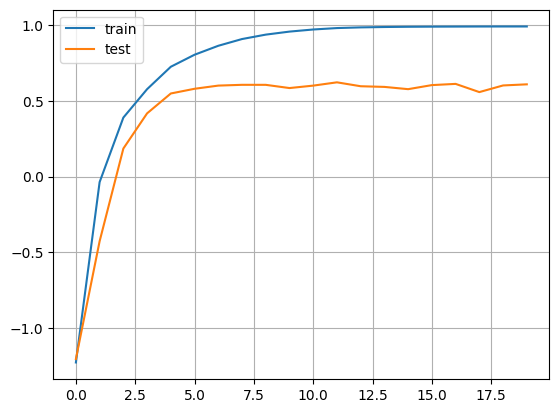

In [340]:
acc.plot.line()
plt.grid()

#model evaluation

##linear regression

In [326]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Test results')
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('R2 Score:', r2_score(y_test, y_test_pred))


Test results
MSE: 627476291.4465132
RMSE: 25049.476869717524
R2 Score: 0.5518402382231746


In [327]:
n = X_train_comb.shape[0]
p = X_train_comb.shape[1] + 1
r2=0.5518402382231746

adj_r2_score = 1 - ((1-r2)*(n-1)/(n-p-1))
print(adj_r2_score)

0.5280812487734676


##knn

In [362]:
print('Test results')
print('MSE:', metrics.mean_squared_error(y_test, y_test_pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_knn)))
print('R2 Score:', r2_score(y_test, y_test_pred_knn))

Test results
MSE: 386596240.5845426
RMSE: 19662.050772606162
R2 Score: 0.723882987379845


In [363]:
n = X_train_comb.shape[0]
p = X_train_comb.shape[1] + 1
r2=0.7638393052034219

adj_r2_score = 1 - ((1-r2)*(n-1)/(n-p-1))
print(adj_r2_score)

0.7513193515291751


##random forest regressor

In [345]:
DTC = DecisionTreeRegressor(max_depth = 11)
DTC.fit(x_train_pca , y_train)

DecisionTreeRegressor(max_depth=11)

In [346]:
print('R2 Score:', r2_score(DTC.predict(x_test_pca), y_test))

R2 Score: 0.5770109068607477


In [348]:
n = X_train_comb.shape[0]
p = X_train_comb.shape[1] + 1
r2=0.5770109068607477

adj_r2_score = 1 - ((1-r2)*(n-1)/(n-p-1))
print(adj_r2_score)

0.5545863291579392
